---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-text-mining/resources/d9pwm) course resource._

---

*Note: Some of the cells in this notebook are computationally expensive. To reduce runtime, this notebook is using a subset of the data.*

# Case Study: Sentiment Analysis

### Data Prep

In [3]:
bb_chars={} 
Walter=''
Skyler=''
Jesse=''
Hank=''
Marie=''
Heisenberg=''
with open("breaking_bad_transcripts/season_all/merged.csv", "r+") as fp:
    for cnt, line in enumerate(fp):
        if line.startswith('Walter:'):
            Walter=Walter+' '+(line[8:])
        elif line.startswith('Skyler:'):
            Skyler=Skyler+' '+(line[8:])
        elif line.startswith('Jesse:'):
            Jesse=Jesse+' '+(line[7:])
        elif line.startswith('Hank:'):
            Hank=Hank+' '+(line[6:])
        if line.startswith('Marie:'):
            Marie=Marie+' '+(line[7:])
        if line.startswith('Heisenberg:'):
            Heisenberg=Heisenberg+' '+(line[12:])

bb_chars['Walter']=Walter
bb_chars['Skyler']=Skyler
bb_chars['Jesse']=Jesse
bb_chars['Hank']=Hank
bb_chars['Marie']=Marie
bb_chars['Heisenberg']=Heisenberg


In [5]:
bb_chars['Walter']

' How does it feel to be a smart ass?\n I was curious. Honestly, I never expected you to amount to much, but methamphetamine? I didn\'t picture that. There\'s a lot of money in it, huh?\n "Cap\'n Cook?" That\'s not you? Like I said, no one is looking for you.\n Not really.\n Short speech. You lost your partner today. What\'s his name – Emilio? Emilio is going to prison. The DEA took all your money, your lab. You got nothing. Square one. But you know the business. And I know the chemistry. I\'m thinking...maybe you and I could partner up.\n That\'s right. Either that...or I turn you in.\n Did you learn nothing from my chemistry class?\n No wonder.\n The shit you cook is shit. I saw your set-up. Ridiculous. You and I will not make garbage. We will produce a chemically pure and stable product that performs as advertised. No adulterants. No baby formula. No chili powder.\n Not anymore.\n Why do you do it?\n There you go.\n I\'m 50.\n I am awake.\n Buy the RV. We start tomorrow.\n After we 

In [10]:
import pandas as pd
df6 = pd.DataFrame([x for x in bb_chars['Walter'].split('\n')])

df5 = pd.DataFrame([x for x in bb_chars['Skyler'].split('\n')])

df4 = pd.DataFrame([x for x in bb_chars['Jesse'].split('\n')])
df3 = pd.DataFrame([x for x in bb_chars['Hank'].split('\n')])

df2 = pd.DataFrame([x for x in bb_chars['Marie'].split('\n')])
df1 = pd.DataFrame([x for x in bb_chars['Heisenberg'].split('\n')])

In [12]:
df2.head()

,0
0,Chemotherapy and marijuana go together like a...
1,"Well, which supermarket? Is it like a big one..."
2,Don't get me wrong. I think it's just great t...
3,You made one mistake.
4,"You can do this, Hank. Come on. It's supposed..."


In [14]:
df6.shape

(791, 1)

In [15]:
listOfScores1 = ['Walter'] *df6.shape[0]
listOfScores2 = ['Skyler'] *df5.shape[0]
listOfScores3 = ['Jesse'] *df4.shape[0]
listOfScores4 = ['Hank'] *df3.shape[0]
listOfScores5 = ['Marie'] *df2.shape[0]


In [16]:
df6['Score'] = listOfScores1
df5['Score'] = listOfScores2 
df4['Score'] = listOfScores3
df3['Score'] = listOfScores4
df2['Score'] = listOfScores5


In [17]:
df2=df2.rename(columns={0: 'dialogue'})
df3=df3.rename(columns={0: 'dialogue'})
df4=df4.rename(columns={0: 'dialogue'})
df5=df5.rename(columns={0: 'dialogue'})
df6=df6.rename(columns={0: 'dialogue'})

In [18]:
df = pd.concat([df2,df3,df4,df5,df6])
df.tail()

,dialogue,Score
786,Hello?,Walter
787,"Yeah, it's done. He's gone. They're all gone.",Walter
788,It's Walt. How are you feeling? Kind of under...,Walter
789,"Well... goodbye, Lydia.",Walter
790,,Walter


In [19]:
from io import StringIO
col = ['Score', 'dialogue']
df = df[col]
df = df[pd.notnull(df['dialogue'])]
df.columns = ['Score', 'dialogue']
df['category_id'] = df['Score'].factorize()[0]
category_id_df = df[['Score', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Score']].values)
df.tail()


,Score,dialogue,category_id
786,Walter,Hello?,4
787,Walter,"Yeah, it's done. He's gone. They're all gone.",4
788,Walter,It's Walt. How are you feeling? Kind of under...,4
789,Walter,"Well... goodbye, Lydia.",4
790,Walter,,4


In [20]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt


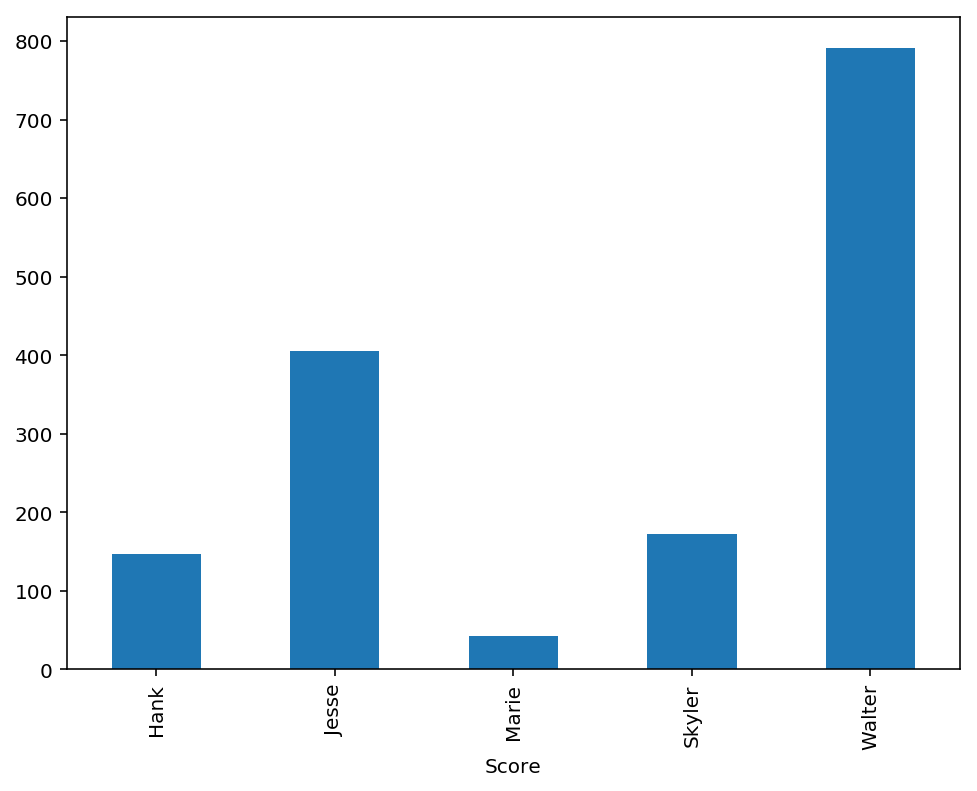

In [21]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Score').dialogue.count().plot.bar(ylim=0)
plt.show()

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.dialogue).toarray()
labels = df.Score
features.shape

(1558, 471)

In [23]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for Score, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Score))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Hank':
  . Most correlated unigrams:
. going
. yo
  . Most correlated bigrams:
. know don
. gus fring
# 'Jesse':
  . Most correlated unigrams:
. going
. yo
  . Most correlated bigrams:
. know don
. gus fring
# 'Marie':
  . Most correlated unigrams:
. going
. yo
  . Most correlated bigrams:
. know don
. gus fring
# 'Skyler':
  . Most correlated unigrams:
. going
. yo
  . Most correlated bigrams:
. know don
. gus fring
# 'Walter':
  . Most correlated unigrams:
. going
. yo
  . Most correlated bigrams:
. know don
. gus fring


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df['dialogue'], df['Score'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [17]:
print(clf.predict(count_vect.transform(["Yeah, well you promised Barry, you d marry him. (Rachel glares at her, and she retreats to safety between Richards legs)"])))

['Ross']


In [18]:
print(clf.predict(count_vect.transform(["And I will be using his dead body as a shield"])))

['Phoebe']


In [19]:
!pip3 install seaborn


You should consider upgrading via the 'pip install --upgrade pip' command.


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

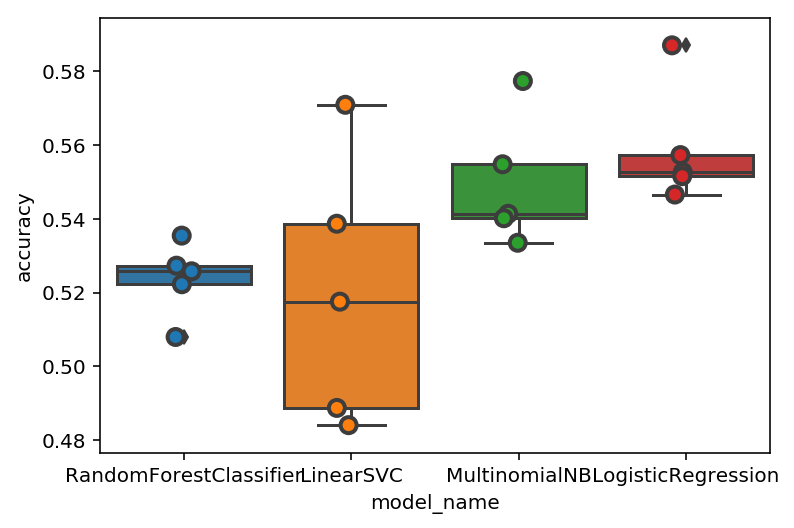

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()


In [26]:
cv_df.groupby('model_name').accuracy.mean()


model_name
LinearSVC                 0.520014
LogisticRegression        0.559075
MultinomialNB             0.549480
RandomForestClassifier    0.523780
Name: accuracy, dtype: float64

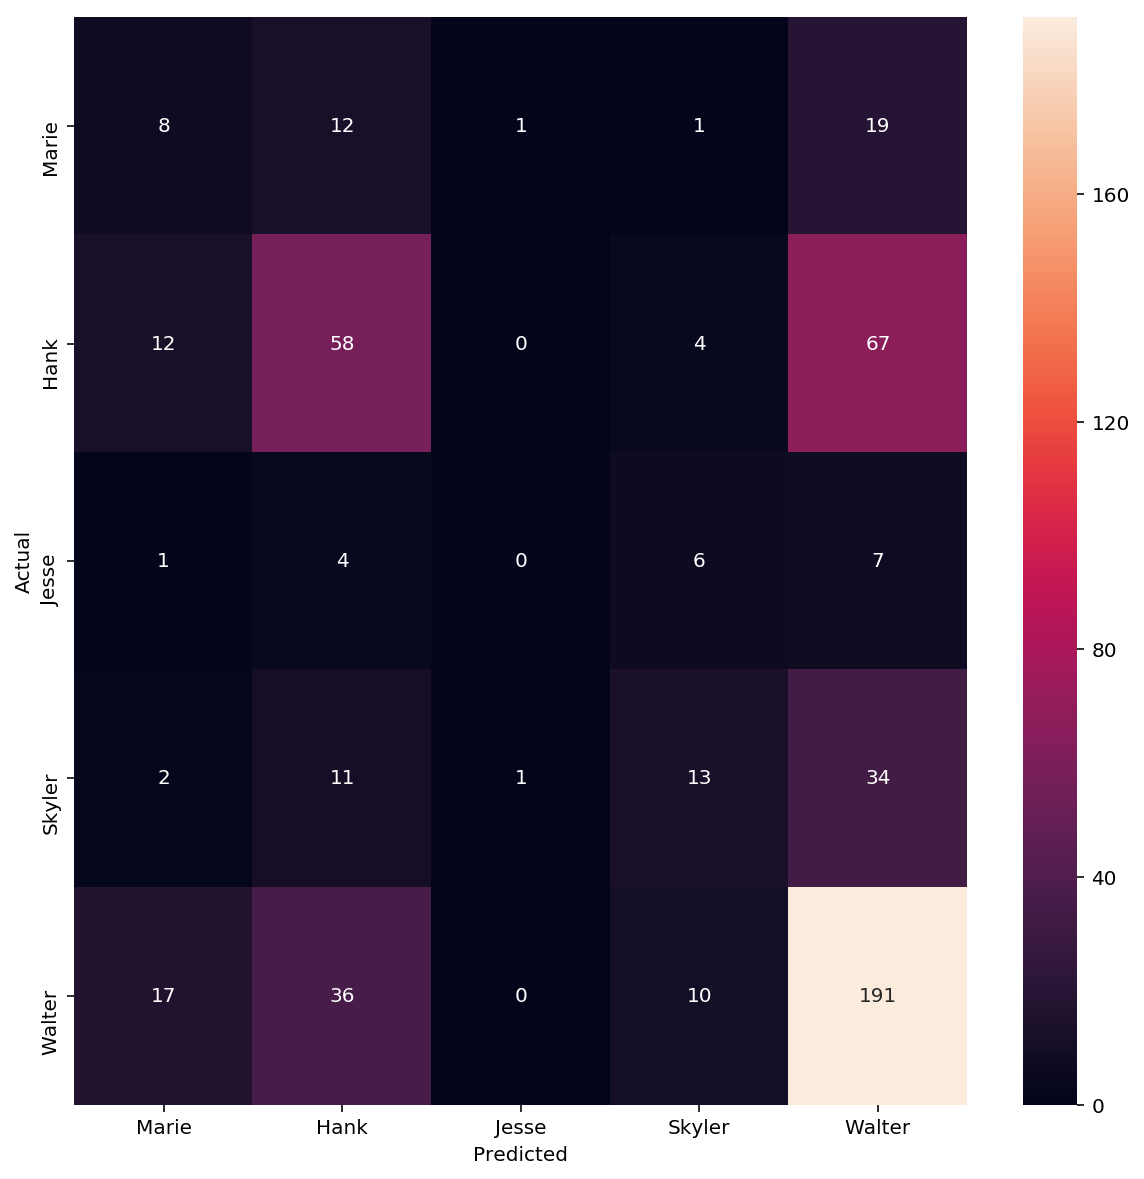

In [27]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Score.values, yticklabels=category_id_df.Score.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [28]:
from IPython.display import display
for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 10:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Score', 'dialogue']])
      print('')

'Hank' predicted as 'Marie' : 12 examples.


,Score,dialogue



'Walter' predicted as 'Marie' : 17 examples.


,Score,dialogue



'Marie' predicted as 'Hank' : 12 examples.


,Score,dialogue



'Skyler' predicted as 'Hank' : 11 examples.


,Score,dialogue



'Walter' predicted as 'Hank' : 36 examples.


,Score,dialogue



'Walter' predicted as 'Skyler' : 10 examples.


,Score,dialogue



'Marie' predicted as 'Walter' : 19 examples.


,Score,dialogue



'Hank' predicted as 'Walter' : 67 examples.


,Score,dialogue



'Skyler' predicted as 'Walter' : 34 examples.


,Score,dialogue


In [29]:
model.fit(features, labels)
N = 2
for Product, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(Product))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))


# 'Hank':
  . Top unigrams:
       . yo
       . stuff
  . Top bigrams:
       . mr white
       . just saying
# 'Jesse':
  . Top unigrams:
       . able
       . flynn
  . Top bigrams:
       . okay just
       . oh god
# 'Marie':
  . Top unigrams:
       . fring
       . christ
  . Top bigrams:
       . son bitch
       . know don
# 'Skyler':
  . Top unigrams:
       . walt
       . ted
  . Top bigrams:
       . right right
       . don wanna
# 'Walter':
  . Top unigrams:
       . victor
       . saul
  . Top bigrams:
       . ve got
       . don think


In [31]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['Score'].unique()))

              precision    recall  f1-score   support

       Marie       0.20      0.20      0.20        41
        Hank       0.48      0.41      0.44       141
       Jesse       0.00      0.00      0.00        18
      Skyler       0.38      0.21      0.27        61
      Walter       0.60      0.75      0.67       254

    accuracy                           0.52       515
   macro avg       0.33      0.31      0.32       515
weighted avg       0.49      0.52      0.50       515

